<a href="https://colab.research.google.com/github/brunamulinari/TechLabsProject_PsiData/blob/main/Pysus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PySUS
!pip install geopandas


In [ ]:
from pysus.online_data.SIM import download
import datetime


df = download(state='PR', year=2018)

In [ ]:
df.shape

(73848, 88)

#A classificação de CID-10 para suícidios vão do código **X60 a X84** (Lesões autoprovocadas intencionalmente)

Na coluna CUSABAS/CAUSABAS_O a classificação CID-10 está presente.

In [ ]:
#Filtro para CID X60 a X84

filter = ['X{}'.format(x) for x in range(600,850)]


In [ ]:
#Novo dataframe apenas com casos de CID-10 X60-X84
cid_10 = df[df['CAUSABAS'].isin(filter) | df['CAUSABAS_O'].isin(filter)]

In [ ]:
cid_10.shape
cid_10['ANO'] = 2018
cid_10['ESTADO'] = 'PR'


In [ ]:
cid_10.head()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,ESTABDESCR,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,SERIESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,...,CIRCOBITO,ACIDTRAB,FONTE,NUMEROLOTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,FONTEINV,DTRECEBIM,ATESTADO,DTRECORIGA,CAUSAMAT,ESCMAEAGR1,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,NUDIASOBIN,DTCADINV,TPOBITOCOR,DTCONINV,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR,ANO,ESTADO
985,1,2,18022018,0800,841,412480,18011979,439,1,4,5,9,9,,,410960,3,,,410960,,,,,,,,,,,,,,,,,2,,,2,...,2,,1,20180035,,,X700,22102018,2,S,S,3.2.00,3.2,,22102018,X700,22102018,,,09,0,1,246,,,,,,,,,,,,,,,11014,2018,PR
993,1,2,25022018,1310,841,410690,27021994,423,1,1,1,3,2,,262105,411950,5,,,411820,,,,,,,,,,,,,,,,,2,,,1,...,2,,1,20180006,N,,X745,22032018,3,S,S,3.2.00,3.2,,29032018,G939/ /X745,29032018,,,11,0,1,032,,,,,,,,,,,,,,,11022,2018,PR
998,1,2,01032018,1200,841,411820,29101968,449,1,1,2,,,,354705,411820,3,,,411820,,,,,,,,,,,,,,,,,2,,,1,...,2,,1,20190001,N,,X700,27032018,3,S,S,3.2.00,3.2,,07012019,T71/X700,29032018,,,,0,1,312,,,,,,,,,,,,,,,11027,2018,PR
999,1,2,02032018,0400,841,411570,07061995,422,1,4,1,3,2,,715210,410765,4,,,411995,,,,,,,,,,,,,,,,,2,,,1,...,2,,1,20190001,N,,X700,06042018,3,S,S,3.2.00,3.2,,07012019,T71/X700,18042018,,,11,0,1,311,,,,,,,,,,,,,,,11028,2018,PR
1296,1,2,20082018,1200,841,410940,18101936,481,1,1,2,2,1,,771105,411995,4,,,411995,,,,,,,,,,,,,,,,,2,,,1,...,2,,1,20180018,N,,X708,06092018,3,S,S,3.2.00,3.2,,12092018,T71/X708,12092018,,,10,0,1,023,,,,,,,,,,,,,,,11326,2018,PR


In [ ]:
df['CIRCOBITO'].unique()

array(['', '9', '1', '4', '3', '2'], dtype=object)

#Construção de dicionario para alterar valores do dataframe por outros padronizados, facilitando as análises em decorrencia de alguns CID-10 erroneos


In [ ]:
#CIRCOBITO 	{9:'Ignorado', 1:'Acidente',2:'Suicídio', 3:'Homicídio',4:'Outros'}

dictCIRCOBITO = {
   '1' : 'Acidente',
    '2' : 'Suicídio',
    '4' : 'Outro',
    '0' : 'NA',
    '9' : "NA"
}

dictSEXO = {
    '1' : 'Masculino',
    '2' : 'Feminino',
    '0' : 'NA',
    '9' : 'NA'
}

dictRACACOR = {
    '1' : 'Branca',
    '2' : 'Preta',
    '3' : 'Amarela',
    '4' : 'Parda',
    '5' : 'Indígena',
    '0' : 'NA'
}

dictESTCIV = {
    '1' : 'Solteiro',
    '2' : 'Casado',
    '3' : 'Viúvo',
    '4' : 'Separado judicialmente',
    '5' : 'União consensual',
    '0' : 'NA', 
    '6' : "NA",
    '7' : "NA",
    '8' : "NA",
    '9' : "NA"
}

dictESCOLAR = {
    '1' : 'Nenhuma',
    '2': '1 a 3 anos',
    '3' : '4 a 7 anos',
    '4' : '8 a 11 anos',
    '5' : '12 e mais',
    '8' : 'De 9 a 11 anos',
    '0' : 'NA',
    '6' : 'NA',
    '7' : 'NA',
    '9' : 'NA',
    ''  : 'NA'
}

dictLOCAL_OCOR = {
    '1' : 'Hospital',
    '2' : 'Outro estabelecimento de saúde',
    '3' : 'Domicílio',
    '4' : 'Via pública',
    '5' : 'Outros',
    '9' : 'NA'
}

dictASSISTMED = {
    '1' : 'Sim',
    '2' : 'Não',
    '9' : 'NA'
}

cid_10 = cid_10.replace({'CIRCOBITO' : dictCIRCOBITO, 'SEXO' : dictSEXO, 'RACACOR' : dictRACACOR, 'ESTCIV' : dictESTCIV, 'ESC' : dictESCOLAR, 'LOCOCOR' : dictLOCAL_OCOR, 'ASSISTMED' : dictASSISTMED})

In [ ]:
#Transformar as datas em timestamp

cid_10['DTNASC'] = cid_10['DTNASC'][cid_10['DTNASC'] !='' ].apply(lambda x: datetime.datetime.strptime(x, "%d%m%Y"))

In [ ]:
cid_10['DTOBITO'] = cid_10['DTOBITO'][cid_10['DTOBITO'] !='' ].apply(lambda x: datetime.datetime.strptime(x, "%d%m%Y"))

In [ ]:
cid_10.shead()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,ESTABDESCR,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,SERIESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,...,CIRCOBITO,ACIDTRAB,FONTE,NUMEROLOTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,FONTEINV,DTRECEBIM,ATESTADO,DTRECORIGA,CAUSAMAT,ESCMAEAGR1,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,NUDIASOBIN,DTCADINV,TPOBITOCOR,DTCONINV,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR,ANO,ESTADO
985,1,2,2018-02-18,0800,841,412480,1979-01-18,439,Masculino,Parda,União consensual,NA,9,,,410960,Domicílio,,,410960,,,,,,,,,,,,,,,,,Não,,,2,...,Suicídio,,1,20180035,,,X700,22102018,2,S,S,3.2.00,3.2,,22102018,X700,22102018,,,09,0,1,246,,,,,,,,,,,,,,,11014,2018,PR
993,1,2,2018-02-25,1310,841,410690,1994-02-27,423,Masculino,Branca,Solteiro,4 a 7 anos,2,,262105,411950,Outros,,,411820,,,,,,,,,,,,,,,,,Não,,,1,...,Suicídio,,1,20180006,N,,X745,22032018,3,S,S,3.2.00,3.2,,29032018,G939/ /X745,29032018,,,11,0,1,032,,,,,,,,,,,,,,,11022,2018,PR
998,1,2,2018-03-01,1200,841,411820,1968-10-29,449,Masculino,Branca,Casado,NA,,,354705,411820,Domicílio,,,411820,,,,,,,,,,,,,,,,,Não,,,1,...,Suicídio,,1,20190001,N,,X700,27032018,3,S,S,3.2.00,3.2,,07012019,T71/X700,29032018,,,,0,1,312,,,,,,,,,,,,,,,11027,2018,PR
999,1,2,2018-03-02,0400,841,411570,1995-06-07,422,Masculino,Parda,Solteiro,4 a 7 anos,2,,715210,410765,Via pública,,,411995,,,,,,,,,,,,,,,,,Não,,,1,...,Suicídio,,1,20190001,N,,X700,06042018,3,S,S,3.2.00,3.2,,07012019,T71/X700,18042018,,,11,0,1,311,,,,,,,,,,,,,,,11028,2018,PR
1296,1,2,2018-08-20,1200,841,410940,1936-10-18,481,Masculino,Branca,Casado,1 a 3 anos,1,,771105,411995,Via pública,,,411995,,,,,,,,,,,,,,,,,Não,,,1,...,Suicídio,,1,20180018,N,,X708,06092018,3,S,S,3.2.00,3.2,,12092018,T71/X708,12092018,,,10,0,1,023,,,,,,,,,,,,,,,11326,2018,PR


In [ ]:
cid_10['IDADE'] = cid_10['DTOBITO'].dt.year - cid_10['DTNASC'].dt.year

cid_10['IDADE'].mean()

42.93804347826087

In [ ]:
cid_10['MES'] = cid_10['DTOBITO'].apply(lambda x: x.strftime('%m'))

dictMES = {
    '01' : 'Janeiro',
    '02' : 'Fevereiro',
    '03' : 'Março',
    '04' : 'Abril',
    '05' : 'Maio',
    '06' : 'Junho',
    '07' : 'Julho',
    '08' : 'Agosto',
    '09' : 'Setembro',
    '10' : 'Outubro',
    '11' : 'Novembro',
    '12' : 'Dezembro'
}

cid_10 = cid_10.replace({'MES':dictMES})

In [ ]:
cid_10['MES'].unique()

array(['Fevereiro', 'Março', 'Agosto', 'Junho', 'Maio', 'Janeiro',
       'Abril', 'Julho', 'Novembro', 'Setembro', 'Outubro', 'Dezembro'],
      dtype=object)

#**Análises Suícidio**

In [ ]:
df_suic = cid_10.loc[cid_10['CIRCOBITO']=='Suicídio']

df_suic.head()

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,ESTABDESCR,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,SERIESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,OBITOPUERP,ASSISTMED,EXAME,CIRURGIA,NECROPSIA,...,ACIDTRAB,FONTE,NUMEROLOTE,TPPOS,DTINVESTIG,CAUSABAS_O,DTCADASTRO,ATESTANTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,FONTEINV,DTRECEBIM,ATESTADO,DTRECORIGA,CAUSAMAT,ESCMAEAGR1,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,NUDIASOBIN,DTCADINV,TPOBITOCOR,DTCONINV,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR,ANO,ESTADO,MES
985,1,2,2018-02-18,0800,841,412480,1979-01-18,39.0,Masculino,Parda,União consensual,NA,9,,,410960,Domicílio,,,410960,,,,,,,,,,,,,,,,,Não,,,2,...,,1,20180035,,,X700,22102018,2,S,S,3.2.00,3.2,,22102018,X700,22102018,,,09,0,1,246,,,,,,,,,,,,,,,11014,2018,PR,Fevereiro
993,1,2,2018-02-25,1310,841,410690,1994-02-27,24.0,Masculino,Branca,Solteiro,4 a 7 anos,2,,262105,411950,Outros,,,411820,,,,,,,,,,,,,,,,,Não,,,1,...,,1,20180006,N,,X745,22032018,3,S,S,3.2.00,3.2,,29032018,G939/ /X745,29032018,,,11,0,1,032,,,,,,,,,,,,,,,11022,2018,PR,Fevereiro
998,1,2,2018-03-01,1200,841,411820,1968-10-29,50.0,Masculino,Branca,Casado,NA,,,354705,411820,Domicílio,,,411820,,,,,,,,,,,,,,,,,Não,,,1,...,,1,20190001,N,,X700,27032018,3,S,S,3.2.00,3.2,,07012019,T71/X700,29032018,,,,0,1,312,,,,,,,,,,,,,,,11027,2018,PR,Março
999,1,2,2018-03-02,0400,841,411570,1995-06-07,23.0,Masculino,Parda,Solteiro,4 a 7 anos,2,,715210,410765,Via pública,,,411995,,,,,,,,,,,,,,,,,Não,,,1,...,,1,20190001,N,,X700,06042018,3,S,S,3.2.00,3.2,,07012019,T71/X700,18042018,,,11,0,1,311,,,,,,,,,,,,,,,11028,2018,PR,Março
1296,1,2,2018-08-20,1200,841,410940,1936-10-18,82.0,Masculino,Branca,Casado,1 a 3 anos,1,,771105,411995,Via pública,,,411995,,,,,,,,,,,,,,,,,Não,,,1,...,,1,20180018,N,,X708,06092018,3,S,S,3.2.00,3.2,,12092018,T71/X708,12092018,,,10,0,1,023,,,,,,,,,,,,,,,11326,2018,PR,Agosto


In [ ]:
df.info()

In [ ]:
df_suic.describe()

,IDADE,ANO
count,889.000000,890.0
mean,42.912261,2018.0
std,17.118333,0.0
min,11.000000,2018.0
25%,29.000000,2018.0
50%,42.000000,2018.0
75%,54.000000,2018.0
max,92.000000,2018.0


In [ ]:
df_suic = df_suic[['ESTADO','ANO','MES','IDADE','SEXO', 'RACACOR', 'ESTCIV', 'LOCOCOR','ESC']]
df_suic.head()


,ESTADO,ANO,MES,IDADE,SEXO,RACACOR,ESTCIV,LOCOCOR,ESC
985,PR,2018,Fevereiro,39.0,Masculino,Parda,União consensual,Domicílio,NA
993,PR,2018,Fevereiro,24.0,Masculino,Branca,Solteiro,Outros,4 a 7 anos
998,PR,2018,Março,50.0,Masculino,Branca,Casado,Domicílio,NA
999,PR,2018,Março,23.0,Masculino,Parda,Solteiro,Via pública,4 a 7 anos
1296,PR,2018,Agosto,82.0,Masculino,Branca,Casado,Via pública,1 a 3 anos


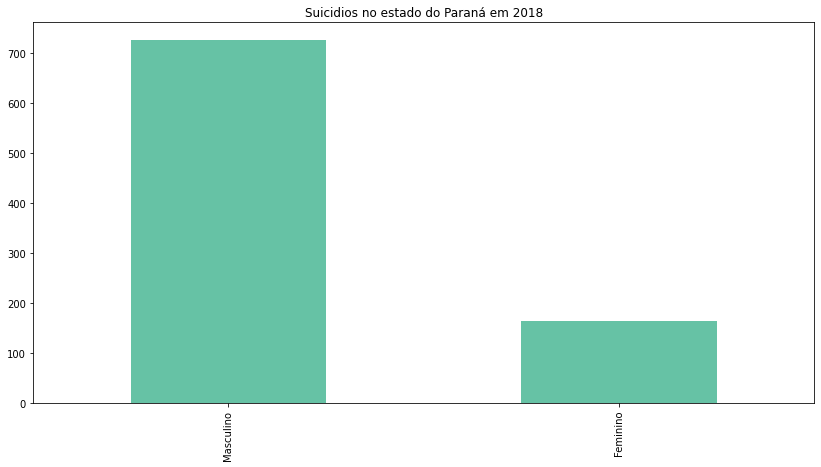

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df_suic.SEXO.value_counts().plot(kind='bar', figsize=(14,7), colormap='Set2', title='Suicidios no estado do Paraná em 2018')

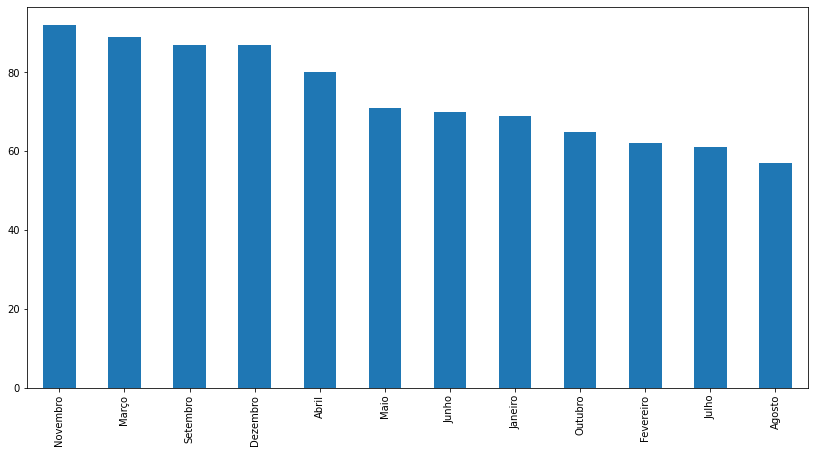

In [ ]:
df_suic.MES.value_counts().plot(kind= 'bar', figsize=(14,7))